# Intoduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.
A classification is where you try to classify something as one thing or another.
A few types of classification problems:
* Binary classification
* Multiclass classifciation
* Multilabel classification 

## Creating Data to view and fit

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X,y = make_circles(n_samples,
                  noise=0.03,
                  random_state=42)
# Checkout features and labels
X,y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

This data is hard to understan, let's visualize

In [4]:
import pandas as pd 
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


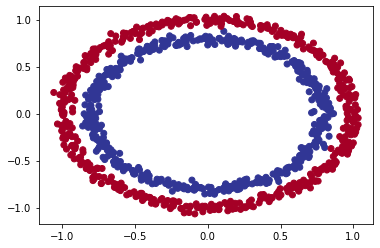

In [7]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

## Input and output shapes

In [11]:
# Check the shapes of our features and labels
X.shape,y.shape

((1000, 2), (1000,))

In [12]:
# Check sample count
len(X),len(y)

(1000, 1000)

In [13]:
# View the first example of features and labels
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling 
The steps in modelling with TensorFlow are typically:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak 
6. Evaluate...

In [14]:
# Import TensorFlow
import tensorflow as tf
tf.__version__

'2.8.0'

In [16]:
# Set random seet
tf.random.set_seed(42)

# Build the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])
# Fit the model
model_1.fit(X,y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 871us/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 839us/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 839us/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 903us/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 839us/step - loss: 0.6942 - accuracy: 0.4820


In [18]:
# Let's improve the model by training longer
model_1.fit(X,y, epochs=200, verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 742us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since this is a binary classification problem and the model is getting ~50% accuracy it appears it is guessing at random

In [20]:
# Set the random seed
tf.random.set_seed(42)
# 1. Create the model with 2 layers this time
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
#2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])
#3. Fit the model
model_2.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 903us/step - loss: 1.8044 - accuracy: 0.5090
Epoch 2/100
32/32 [==============================] - 0s 935us/step - loss: 0.7235 - accuracy: 0.5030
Epoch 3/100
32/32 [==============================] - 0s 871us/step - loss: 0.7145 - accuracy: 0.4950
Epoch 4/100
32/32 [==============================] - 0s 903us/step - loss: 0.7078 - accuracy: 0.5010
Epoch 5/100
32/32 [==============================] - 0s 839us/step - loss: 0.7037 - accuracy: 0.5010
Epoch 6/100
32/32 [==============================] - 0s 1000us/step - loss: 0.7008 - accuracy: 0.4960
Epoch 7/100
32/32 [==============================] - 0s 852us/step - loss: 0.7001 - accuracy: 0.4990
Epoch 8/100
32/32 [==============================] - 0s 904us/step - loss: 0.6984 - accuracy: 0.4980
Epoch 9/100
32/32 [==============================] - 0s 903us/step - loss: 0.6973 - accuracy: 0.4960
Epoch 10/100
32/32 [==============================] - 0s 903us/step - loss: 0.6962 - accur

32/32 [==============================] - 0s 871us/step - loss: 0.6941 - accuracy: 0.4820
Epoch 82/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.4920
Epoch 83/100
32/32 [==============================] - 0s 935us/step - loss: 0.6938 - accuracy: 0.5120
Epoch 84/100
32/32 [==============================] - 0s 1000us/step - loss: 0.6941 - accuracy: 0.5000
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.4830
Epoch 86/100
32/32 [==============================] - 0s 968us/step - loss: 0.6937 - accuracy: 0.4830
Epoch 87/100
32/32 [==============================] - 0s 903us/step - loss: 0.6940 - accuracy: 0.4880
Epoch 88/100
32/32 [==============================] - 0s 871us/step - loss: 0.6941 - accuracy: 0.4860
Epoch 89/100
32/32 [==============================] - 0s 903us/step - loss: 0.6943 - accuracy: 0.4910
Epoch 90/100
32/32 [==============================] - 0s 936us/step - loss: 0.6939 - accuracy: 0.4

In [21]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 819us/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314204216003, 0.5]

Adding a single extra layer had no effect on accuracy

## Improving our model

1. Create a model - we might add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might choose a different optimization function such as Adam instead of SGD
3. Fitting a model - perhaps we might fit our model for more epochs (leaving it to train longer)

In [25]:
# Set random seed
tf.random.set_seed(42)
# 1. Build the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])
# 3. Fit the model
model_3.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 2.9658 - accuracy: 0.4490
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7229 - accuracy: 0.4390
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6971 - accuracy: 0.4700
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6953 - accuracy: 0.4620
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.4750
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.4750
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.5040
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6946 - accuracy: 0.4980
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.4880
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.4480
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 0.6968 - accuracy: 0.4830
Epoch 83/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7002 - accuracy: 0.4480
Epoch 84/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6963 - accuracy: 0.4970
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6967 - accuracy: 0.4590
Epoch 86/100
32/32 [==============================] - 0s 962us/step - loss: 0.7002 - accuracy: 0.4900
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6977 - accuracy: 0.4550
Epoch 88/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6981 - accuracy: 0.4590
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6979 - accuracy: 0.4750
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6981 - accuracy: 0.4620
Epoch 91/100
32/32 [==============================] - 0s 1000us/step - loss: 0.6984 - accuracy: 0.4980
Epoch 92

In [26]:
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               300       
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


In [27]:
model_3.predict(X)

array([[0.48793244],
       [0.558876  ],
       [0.56292844],
       [0.5705067 ],
       [0.44141144],
       [0.57388216],
       [0.5576486 ],
       [0.48246646],
       [0.4775583 ],
       [0.57502264],
       [0.514849  ],
       [0.530877  ],
       [0.56437737],
       [0.45787305],
       [0.45052725],
       [0.461299  ],
       [0.5405582 ],
       [0.4638092 ],
       [0.5479803 ],
       [0.50375676],
       [0.5063044 ],
       [0.58775455],
       [0.4590246 ],
       [0.49123323],
       [0.583216  ],
       [0.5704256 ],
       [0.55239356],
       [0.4631735 ],
       [0.45773405],
       [0.45440978],
       [0.47872233],
       [0.57856053],
       [0.5554615 ],
       [0.46339148],
       [0.45849162],
       [0.58986676],
       [0.5724737 ],
       [0.52974397],
       [0.45870548],
       [0.51092887],
       [0.49994153],
       [0.5463086 ],
       [0.51099026],
       [0.4579724 ],
       [0.5223273 ],
       [0.53888035],
       [0.44872284],
       [0.544

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:
* Take in a trained model, features (X) and the label(y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [45]:
import numpy as np

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X
    """
    # Define the acis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min()-0.1,X[:, 0].max()+0.1
    y_min, y_max = X[:, 1].min()-0.1,X[:, 1].max()+0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min,y_max,100))
    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together
    
    # Make predictions
    y_pred = model.predict(x_in)
    
    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred,axis =1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())

doing binary classification


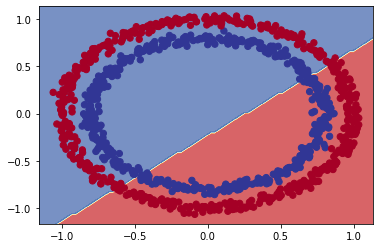

In [46]:
# Checkout the predictions our model is making
plot_decision_boundary(model=model_3,
                      X=X,
                      y=y)

In [59]:
# Let's see if our model can be used for a regression problem...
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) # y = X + 100

# Split the data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]


The model was compiled for a binary classification but this is a regression problem.
Let's change the model to suit the data

In [60]:
# Set seed
tf.random.set_seed(42)
# Create model|
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# Compile the model
model_4.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['mae'])
# Fit the model
model_4.fit(tf.expand_dims(X_reg_train,axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 1ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 1ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 1ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 1000us/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 1ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 1ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 1ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 1ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 1ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 1ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 

5/5 [==============================] - 0s 1ms/step - loss: 38.6614 - mae: 38.6614
Epoch 87/100
5/5 [==============================] - 0s 1000us/step - loss: 38.8399 - mae: 38.8399
Epoch 88/100
5/5 [==============================] - 0s 1ms/step - loss: 38.6604 - mae: 38.6604
Epoch 89/100
5/5 [==============================] - 0s 1ms/step - loss: 38.7559 - mae: 38.7559
Epoch 90/100
5/5 [==============================] - 0s 1ms/step - loss: 38.5442 - mae: 38.5442
Epoch 91/100
5/5 [==============================] - 0s 1ms/step - loss: 38.3247 - mae: 38.3247
Epoch 92/100
5/5 [==============================] - 0s 1ms/step - loss: 38.8431 - mae: 38.8431
Epoch 93/100
5/5 [==============================] - 0s 1ms/step - loss: 39.1137 - mae: 39.1137
Epoch 94/100
5/5 [==============================] - 0s 1ms/step - loss: 38.1463 - mae: 38.1463
Epoch 95/100
5/5 [==============================] - 0s 1ms/step - loss: 38.3998 - mae: 38.3998
Epoch 96/100
5/5 [==============================] - 0s 1000u

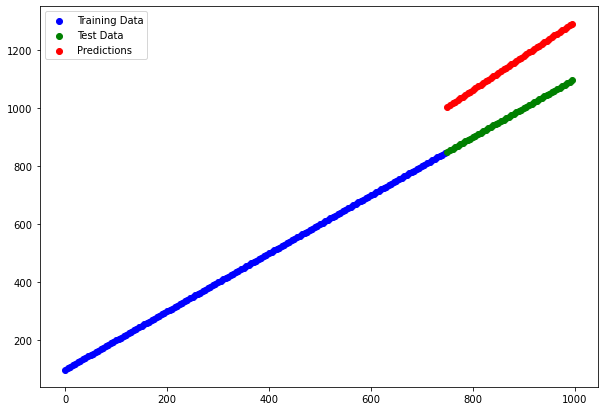

In [75]:
# Make predictions with our trained model
y_reg_preds = model_4.predict(y_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training Data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test Data")
plt.scatter(X_reg_test,y_reg_preds, c="r", label="Predictions")
plt.legend();

## The missing piece: non-linearity 

In [76]:
# Set the random seed 
tf.random.set_seed(42)

# 1. Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])
# 2. Compile the model
model_5.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])
# 3. Fit the model
history = model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 936us/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 936us/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 893us/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 871us/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 903us/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 935us/step - loss: 3.9642 - accuracy: 0.4180
Epoch 7/100
32/32 [==============================] - 0s 871us/step - loss: 3.8626 - accuracy: 0.4100
Epoch 8/100
32/32 [==============================] - 0s 839us/step - loss: 3.8123 - accuracy: 0.4160
Epoch 9/100
32/32 [==============================] - 0s 903us/step - loss: 3.7802 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 839us/step - loss: 3.7419 - accura

32/32 [==============================] - 0s 903us/step - loss: 0.7226 - accuracy: 0.4830
Epoch 82/100
32/32 [==============================] - 0s 823us/step - loss: 0.7214 - accuracy: 0.4830
Epoch 83/100
32/32 [==============================] - 0s 871us/step - loss: 0.7204 - accuracy: 0.4840
Epoch 84/100
32/32 [==============================] - 0s 871us/step - loss: 0.7193 - accuracy: 0.4840
Epoch 85/100
32/32 [==============================] - 0s 839us/step - loss: 0.7182 - accuracy: 0.4860
Epoch 86/100
32/32 [==============================] - 0s 839us/step - loss: 0.7173 - accuracy: 0.4880
Epoch 87/100
32/32 [==============================] - 0s 839us/step - loss: 0.7163 - accuracy: 0.4880
Epoch 88/100
32/32 [==============================] - 0s 839us/step - loss: 0.7154 - accuracy: 0.4880
Epoch 89/100
32/32 [==============================] - 0s 871us/step - loss: 0.7145 - accuracy: 0.4880
Epoch 90/100
32/32 [==============================] - 0s 871us/step - loss: 0.7136 - accuracy: 

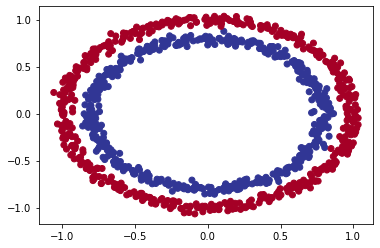

In [77]:
# Visualize the data
plt.scatter(X[:, 0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

doing binary classification


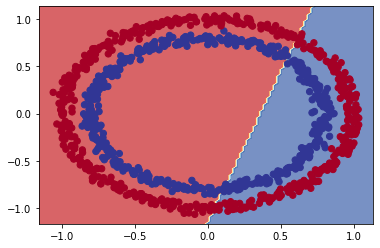

In [78]:
# Check the decision boundary for out latest model
plot_decision_boundary(model=model_5,
                      X=X,
                      y=y)

In [81]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])
# 3. Fit the model
history = model_6.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 903us/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 871us/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 903us/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 872us/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 839us/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 839us/step - loss: 3.9642 - accuracy: 0.4180
Epoch 7/100
32/32 [==============================] - 0s 839us/step - loss: 3.8626 - accuracy: 0.4100
Epoch 8/100
32/32 [==============================] - 0s 871us/step - loss: 3.8123 - accuracy: 0.4160
Epoch 9/100
32/32 [==============================] - 0s 968us/step - loss: 3.7802 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 935us/step - loss: 3.7419 - accura

Epoch 82/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7214 - accuracy: 0.4830
Epoch 83/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7204 - accuracy: 0.4840
Epoch 84/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7193 - accuracy: 0.4840
Epoch 85/100
32/32 [==============================] - 0s 903us/step - loss: 0.7182 - accuracy: 0.4860
Epoch 86/100
32/32 [==============================] - 0s 968us/step - loss: 0.7173 - accuracy: 0.4880
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7163 - accuracy: 0.4880
Epoch 88/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7154 - accuracy: 0.4880
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7145 - accuracy: 0.4880
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7136 - accuracy: 0.4880
Epoch 91/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7128 - accuracy: 0.4

In [84]:
# Replication of tensorflow playground

# Set the random seed 
tf.random.set_seed(42)
# 1. Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])
# 2. Compile the model 
model_7.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])
# 3. fit the model
history = model_7.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1000us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 956us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 968us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 1000us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 968us/step - loss: 7.7125 - accuracy: 0.50

32/32 [==============================] - 0s 935us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 82/100
32/32 [==============================] - 0s 935us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 83/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 84/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 85/100
32/32 [==============================] - 0s 968us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 86/100
32/32 [==============================] - 0s 968us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 87/100
32/32 [==============================] - 0s 1000us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 88/100
32/32 [==============================] - 0s 1000us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000

In [85]:
# Evaluate the model
model_7.evaluate(X,y)

32/32 [==============================] - 0s 774us/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

doing binary classification


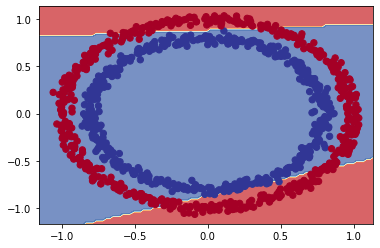

In [86]:
plot_decision_boundary(model_7,X,y)

In [90]:
# 1. Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
# 2. Compile the model 
model_8.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])
# 3. fit the model
history = model_8.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 936us/step - loss: 0.7008 - accuracy: 0.4940
Epoch 2/100
32/32 [==============================] - 0s 920us/step - loss: 0.6981 - accuracy: 0.4860
Epoch 3/100
32/32 [==============================] - 0s 935us/step - loss: 0.6963 - accuracy: 0.4700
Epoch 4/100
32/32 [==============================] - 0s 903us/step - loss: 0.6954 - accuracy: 0.4560
Epoch 5/100
32/32 [==============================] - 0s 968us/step - loss: 0.6947 - accuracy: 0.4390
Epoch 6/100
32/32 [==============================] - 0s 935us/step - loss: 0.6942 - accuracy: 0.4390
Epoch 7/100
32/32 [==============================] - 0s 871us/step - loss: 0.6934 - accuracy: 0.4760
Epoch 8/100
32/32 [==============================] - 0s 935us/step - loss: 0.6931 - accuracy: 0.4540
Epoch 9/100
32/32 [==============================] - 0s 903us/step - loss: 0.6926 - accuracy: 0.4430
Epoch 10/100
32/32 [==============================] - 0s 1000us/step - loss: 0.6922 - accur

32/32 [==============================] - 0s 903us/step - loss: 0.4285 - accuracy: 0.9870
Epoch 82/100
32/32 [==============================] - 0s 888us/step - loss: 0.4183 - accuracy: 0.9930
Epoch 83/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4079 - accuracy: 0.9920
Epoch 84/100
32/32 [==============================] - 0s 935us/step - loss: 0.3978 - accuracy: 0.9890
Epoch 85/100
32/32 [==============================] - 0s 935us/step - loss: 0.3878 - accuracy: 0.9930
Epoch 86/100
32/32 [==============================] - 0s 935us/step - loss: 0.3793 - accuracy: 0.9920
Epoch 87/100
32/32 [==============================] - 0s 936us/step - loss: 0.3686 - accuracy: 0.9920
Epoch 88/100
32/32 [==============================] - 0s 936us/step - loss: 0.3589 - accuracy: 0.9910
Epoch 89/100
32/32 [==============================] - 0s 935us/step - loss: 0.3501 - accuracy: 0.9930
Epoch 90/100
32/32 [==============================] - 0s 936us/step - loss: 0.3412 - accuracy: 0.

In [91]:
# Evaluate the model
model_8.evaluate(X,y)

32/32 [==============================] - 0s 903us/step - loss: 0.2550 - accuracy: 0.9960


[0.2549828290939331, 0.9959999918937683]

doing binary classification


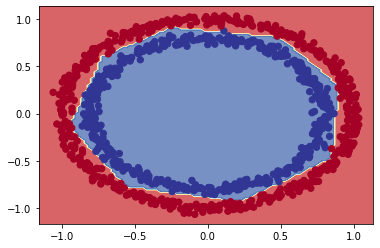

In [92]:
plot_decision_boundary(model_8,X,y)

The combination of linear and non-linear functions is one of the key fundamentals of neural networks

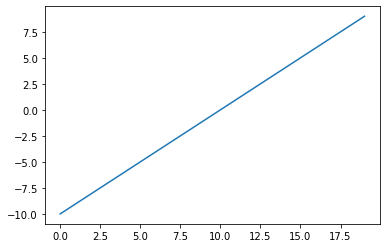

In [93]:
# Create a toy tensor 
A = tf.cast(tf.range(-10,10),tf.float32)
plt.plot(A)

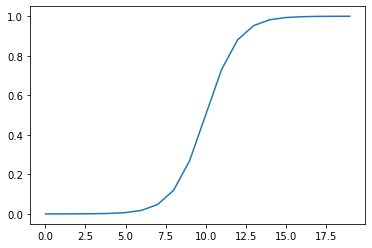

In [95]:
# Replicating sigmoid - sigmoid(x) = 1 / (1+exp(-x))
def sigmoid(x):
    return 1/(1+tf.exp(-x))
# Use the sigmoid function on our toy tensor
sigmoid(A)
plt.plot(sigmoid(A))

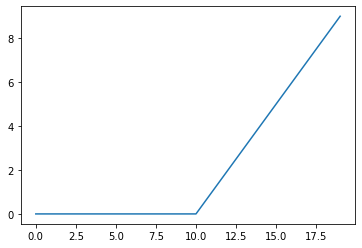

In [97]:
# Recreating the relu formule
def relu(x):
    return tf.maximum(0,x)
relu(A)
plt.plot(relu(A))

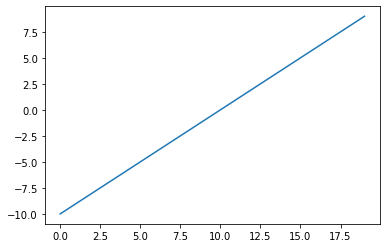

In [98]:
# Leanr activation
tf.keras.activations.linear(A)
plt.plot(tf.keras.activations.linear(A))

## Evaluating and improving our classification 

Creating a training and test set

In [99]:
# Check how many samples we have 
len(X)

1000

In [104]:
# Use Scikit-Learn to generate test/train split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [110]:
# Recreate a model 

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
# 2. Compile the model
model_9.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
               metrics=["accuracy"])
# 3. Fit the model
model_9.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 875us/step - loss: 0.6789 - accuracy: 0.5813
Epoch 2/25
25/25 [==============================] - 0s 833us/step - loss: 0.6268 - accuracy: 0.6550
Epoch 3/25
25/25 [==============================] - 0s 874us/step - loss: 0.5361 - accuracy: 0.7225
Epoch 4/25
25/25 [==============================] - 0s 875us/step - loss: 0.2902 - accuracy: 0.9000
Epoch 5/25
25/25 [==============================] - 0s 833us/step - loss: 0.2912 - accuracy: 0.8813
Epoch 6/25
25/25 [==============================] - 0s 876us/step - loss: 0.1646 - accuracy: 0.9438
Epoch 7/25
25/25 [==============================] - 0s 916us/step - loss: 0.0973 - accuracy: 0.9775
Epoch 8/25
25/25 [==============================] - 0s 875us/step - loss: 0.0742 - accuracy: 0.9812
Epoch 9/25
25/25 [==============================] - 0s 875us/step - loss: 0.0917 - accuracy: 0.9663
Epoch 10/25
25/25 [==============================] - 0s 833us/step - loss: 0.0668 - accuracy: 0.9850

In [111]:
# 4. Evaluate
model_9.evaluate(X_test,y_test)

7/7 [==============================] - 0s 834us/step - loss: 0.1315 - accuracy: 0.9400


[0.13148632645606995, 0.9399999976158142]

doing binary classification
doing binary classification


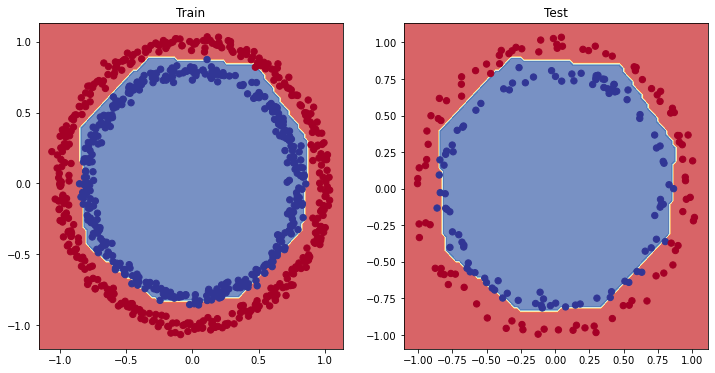

In [112]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_9, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_9, X=X_test, y=y_test)
plt.show()

## Plot the loss/training curves

Text(0.5, 1.0, 'Model_8 Loss Curve')

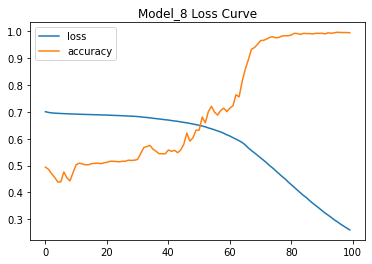

In [119]:
pd.DataFrame(history.history).plot()
plt.title("Model_8 Loss Curve")

the loss function going down means the model is getting closer to the ground truth

## Finding the best learning rate 

To find the ideal learning rate (The learning rate where the loss screases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add while it's training.
* Another model
* A modifed loss curves plot

In [122]:
# Set random seed 
tf.random.set_seed(42)
# Create a model 
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
# Compile the model
model_10.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])
# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
# Fit the model (passing lr_scheduler callback)
history_10 = model_10.fit(X_train,
                         y_train,
                         epochs=100,
                         callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 1000us/step - loss: 0.6917 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 958us/step - loss: 0.6910 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6903 - accuracy: 0.4975 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6897 - accuracy: 0.5075 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 917us/step - loss: 0.6888 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 917us/step - loss: 0.6881 - accuracy: 0.5075 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6873 - accuracy: 0.5050 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 1000us/step - loss: 0.6864 - accuracy: 0.5088 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 958u

25/25 [==============================] - 0s 1ms/step - loss: 0.3654 - accuracy: 0.8562 - lr: 0.3548
Epoch 73/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4717 - accuracy: 0.8850 - lr: 0.3981
Epoch 74/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4545 - accuracy: 0.8087 - lr: 0.4467
Epoch 75/100
25/25 [==============================] - 0s 1000us/step - loss: 0.4118 - accuracy: 0.8388 - lr: 0.5012
Epoch 76/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4202 - accuracy: 0.8325 - lr: 0.5623
Epoch 77/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4210 - accuracy: 0.8288 - lr: 0.6310
Epoch 78/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5934 - accuracy: 0.6925 - lr: 0.7079
Epoch 79/100
25/25 [==============================] - 0s 1000us/step - loss: 0.4451 - accuracy: 0.7900 - lr: 0.7943
Epoch 80/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6497 - accuracy: 0.5738 - l

<AxesSubplot:xlabel='epochs'>

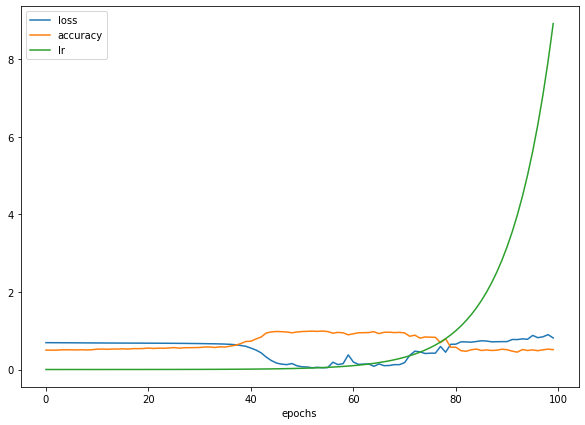

In [124]:
# Check the history
pd.DataFrame(history_10.history).plot(figsize=(10,7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs Loss')

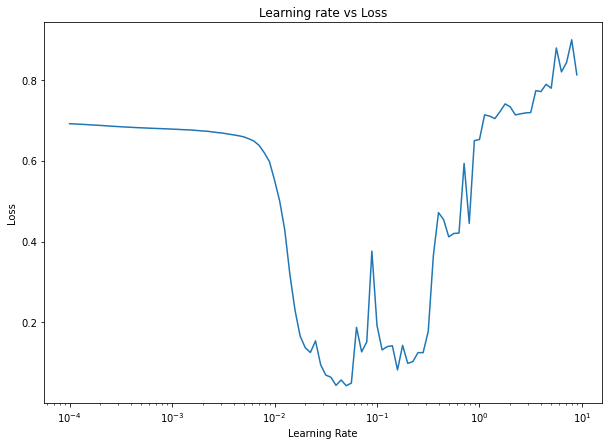

In [127]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_10.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

In [126]:
len(lrs)

100

In [129]:
# Using a higher *ideal* learning rate with the same model

# Set seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
# Compile the model
model_11.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=["accuracy"])
# Fit the model
history_11 = model_11.fit(X_train,y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6801 - accuracy: 0.5863
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6694 - accuracy: 0.5888
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6533 - accuracy: 0.6075
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6342 - accuracy: 0.6475
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5787 - accuracy: 0.7200
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5361 - accuracy: 0.7500
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4275 - accuracy: 0.8662
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3479 - accuracy: 0.9137
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2778 - accuracy: 0.9350
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2362 - accuracy: 0.9538
Epoch 11/20
25/25 [

In [131]:
# Evaluate model 10
model_11.evaluate(X_test,y_test)

7/7 [==============================] - 0s 1000us/step - loss: 0.2150 - accuracy: 0.9100


[0.21504610776901245, 0.9100000262260437]

doing binary classification
doing binary classification


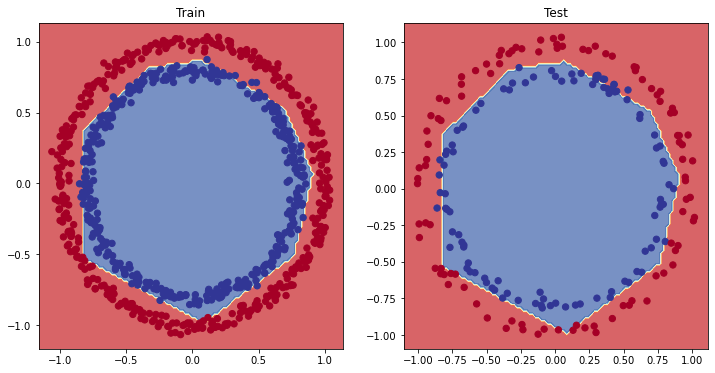

In [133]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_11,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_11,X=X_test, y=y_test)
plt.show()

## More classification evaluation methods 

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods and metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn)

In [134]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 1ms/step - loss: 0.9604 - accuracy: 0.5000
Model loss on the test set: 0.9603617191314697
Model accuracy on the test set: 50.00%


## Confusion matrix

In [136]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_11.predict(X_test)

# Create confusion matrix 
confusion_matrix(y_test,y_preds)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [137]:
y_test[:10],y_preds[:10]

(array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int64),
 array([[9.3463719e-01],
        [8.5691810e-03],
        [9.8140264e-01],
        [9.2452765e-04],
        [6.1867678e-01],
        [6.9378245e-01],
        [4.1258335e-04],
        [1.0053515e-03],
        [9.2127573e-01],
        [5.6455433e-03]], dtype=float32))

The predictions array has come out in prediction probability form... the standard output from the sigmoid (or softmax) activation functions.

In [138]:
# Convert our prediciton porbabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [139]:
# Create a confusion matrix
confusion_matrix(y_test,tf.round(y_preds))

array([[99,  1],
       [17, 83]], dtype=int64)

 Prettify our confusion matrix

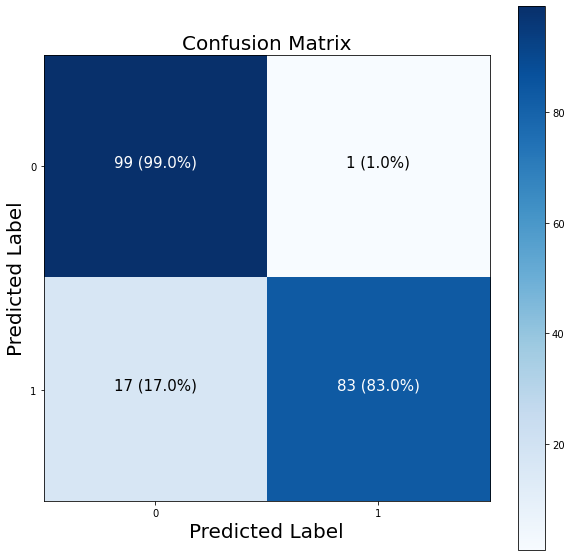

In [149]:
# Note: The confusion matrix code is a remix of scikit-learn's plot confusion matrix

import itertools

figsize = (10,10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float")/ cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False
if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

# Label the axes 
ax.set(title="Confusion Matrix",
      xlabel="Predicted Label",
      ylabel="Predicted Label",
      xticks=np.arange(n_classes),
      yticks=np.arange(n_classes),
      xticklabels=labels,
      yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()
# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set the threshold for different colors
threshold = (cm.max() + cm.min())/2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j] > threshold else "black",
            size=15)